<a href="https://colab.research.google.com/github/SnrPep/Mos/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import string

# Загрузка датасета
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['tweet', 'label']]
df.columns = ['text', 'label']

# Функция предобработки текста
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

# Применение предобработки
df['clean_text'] = df['text'].astype(str).apply(preprocess)



In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Векторизация с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']


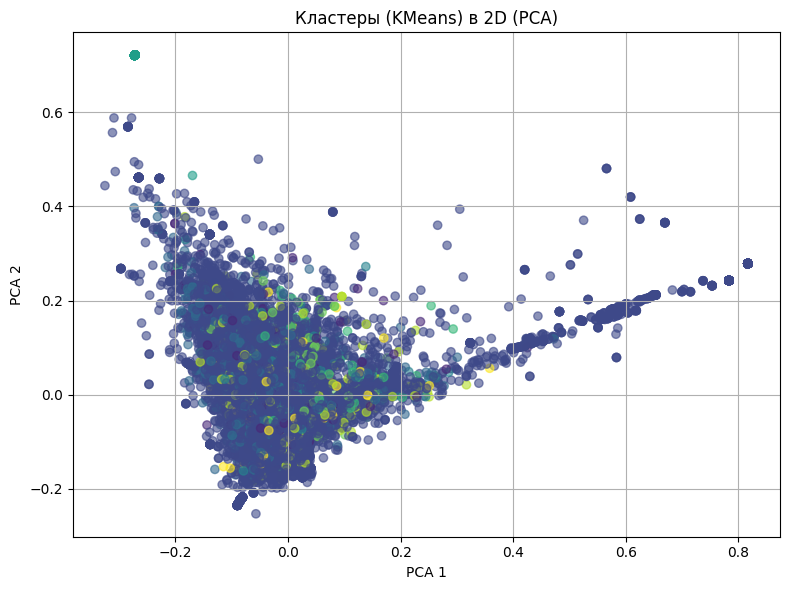

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Снижение размерности для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Кластеры (KMeans) в 2D (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


Кластреры выглядят достаточно кучно, самый большой - синий

In [4]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [5]:
import numpy as np

# Функция линейной регрессии
def linear_regression(X):
    return np.sum(X, axis=1) * 0.1

# Функция активации
def activation_func(x):
    return np.where(x > 0.5, 1, 0)

# Функция "нейрона"
def neuron(X):
    temp_result = linear_regression(X)
    return activation_func(temp_result)

# Предсказания на валидационной выборке
val_preds = neuron(X_val)


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4442
           1       0.00      0.00      0.00       352

    accuracy                           0.93      4794
   macro avg       0.46      0.50      0.48      4794
weighted avg       0.86      0.93      0.89      4794

Accuracy: 0.9265748852732583


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


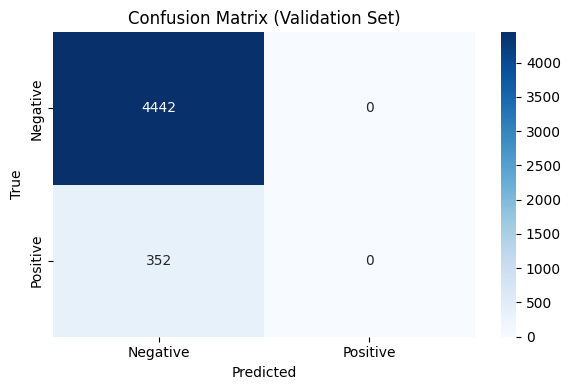

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Отчет по метрикам
print("Classification Report (Validation Set):")
print(classification_report(y_val, val_preds))

print("Accuracy:", accuracy_score(y_val, val_preds))

# Матрица ошибок
cm = confusion_matrix(y_val, val_preds)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix (Validation Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
